In [1]:
# Import necessary libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import re
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
# Set up Splinter
browser = Browser('chrome')

# Set up base url
base_url = "https://www.facebook.com/marketplace/toronto/search?"

# Set up search parameters
min_price = 1000
max_price = 30000
days_listed = 7
min_mileage = 50000
max_mileage = 200000
min_year =  2000
max_year = 2020
transmission = "automatic"
make = "Honda"
model = "Civic"

#Set up full url
url = f"{base_url}minPrice={min_price}&maxPrice={max_price}&daysSinceListed={days_listed}&maxMileage={max_mileage}&maxYear={max_year}&minMileage={min_mileage}&minYear={min_year}&transmissionType={transmission}&query={make}{model}&exact=false"



In [3]:
# Visit the website
browser.visit(url)

In [4]:
# Scroll down to load more results

scroll_count = 4

scroll_delay = 2

for _ in range(scroll_count):

    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);") 
    
    time.sleep(scroll_delay)

In [5]:
# Parse the HTML
html = browser.html    
# Create a BeautifulSoup object from the scraped HTML
market_soup = soup(html, 'html.parser')
# Check if HTML was scraped correctly
market_soup

<html class="_9dls __fb-light-mode" dir="ltr" id="facebook" lang="en"><head><link data-badged-icon="https://static.xx.fbcdn.net/rsrc.php/yD/r/UJj0tgk-RrT.ico" data-default-icon="https://static.xx.fbcdn.net/rsrc.php/yT/r/aGT3gskzWBf.ico" href="https://static.xx.fbcdn.net/rsrc.php/yT/r/aGT3gskzWBf.ico" rel="shortcut icon"/><meta content="width=device-width,initial-scale=1,maximum-scale=2,shrink-to-fit=no" name="viewport"/><link crossorigin="use-credentials" href="/data/manifest/" id="MANIFEST_LINK" rel="manifest"/><meta content="light" name="color-scheme"/><meta content="#FFFFFF" name="theme-color"/><style nonce="">:root{--fds-black:#000000;--fds-black-alpha-05:rgba(0, 0, 0, 0.05);--fds-black-alpha-10:rgba(0, 0, 0, 0.1);--fds-black-alpha-15:rgba(0, 0, 0, 0.15);--fds-black-alpha-20:rgba(0, 0, 0, 0.2);--fds-black-alpha-30:rgba(0, 0, 0, 0.3);--fds-black-alpha-40:rgba(0, 0, 0, 0.4);--fds-black-alpha-50:rgba(0, 0, 0, 0.5);--fds-black-alpha-60:rgba(0, 0, 0, 0.6);--fds-black-alpha-80:rgba(0, 0,

In [6]:
# End the automated browsing session
browser.quit()

In [7]:
# Extract all the necessary info and insert into lists
titles_div = market_soup.find_all('span', class_="x1lliihq x6ikm8r x10wlt62 x1n2onr6")
titles_list = [title.text.strip() for title in titles_div]
prices_div = market_soup.find_all('span', class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x xudqn12 x676frb x1lkfr7t x1lbecb7 x1s688f xzsf02u")
prices_list = [price.text.strip() for price in prices_div]
mileage_div = market_soup.find_all('span', class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x x4zkp8e x3x7a5m x1nxh6w3 x1sibtaa xo1l8bm xi81zsa")
mileage_list = [mileage.text.strip() for mileage in mileage_div]
urls_div = market_soup.find_all('a', class_="x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x1heor9g x1lku1pv")
urls_list = [url.get('href') for url in urls_div]

In [8]:
mileage_list

['Mississauga, ON',
 '98K km',
 'Mississauga, ON',
 '166K km',
 'Toronto, ON',
 '154K km',
 'Toronto, ON',
 '163K km',
 'Toronto, ON',
 '64K km',
 'Selwyn, ON',
 '198K km',
 'Cambridge, ON',
 '193K km',
 'Toronto, ON',
 '96K km',
 'Toronto, ON',
 '136K km',
 'Cambridge, ON',
 '170K km',
 'Brampton, ON',
 '181K km',
 'Oakville, ON',
 '189K km',
 'Toronto, ON',
 '89K km',
 'Toronto, ON',
 '197K km',
 'Toronto, ON',
 '194K km',
 'Toronto, ON',
 '57K km',
 'Brampton, ON',
 '198K km',
 'Mississauga, ON',
 '182K km',
 'Toronto, ON',
 '161K km',
 'Brampton, ON',
 '180K km',
 'Brampton, ON',
 '104K km',
 'Mississauga, ON',
 '155K km',
 'Vaughan, ON',
 '151K km',
 'Mississauga, ON',
 '187K km',
 'Toronto, ON',
 '173K km',
 'Toronto, ON',
 '130K km',
 'Toronto, ON',
 '180K km',
 'Brampton, ON',
 '164K km',
 'Toronto, ON',
 '78K km',
 'Hamilton, ON',
 '163K km',
 'Milton, ON',
 '145K km',
 'Toronto, ON',
 '165K km',
 'Toronto, ON',
 '150K km',
 'Newmarket, ON',
 '200K km',
 'Toronto, ON',
 '91K k

In [9]:
# Create a regular expression pattern to match city and state entries like "City, State"
pattern = re.compile(r'(\w+(?:-\w+)?, [A-Z]{2})')
# Initialize an empty list to store adjusted mileage entries
mileage_list2 = []

# Iterate through the original mileage entries
for item in mileage_list:
    mileage_list2.append(item)
    
    if pattern.match(item) and len(mileage_list2) >= 2 and pattern.match(mileage_list2[-2]):
        mileage_list2.insert(-1, '0K km')


In [10]:
mileage_pattern_km = r'(\d+)K km'
mileage_pattern_miles = r'(\d+)K miles'

mileage_clean = []

for item in mileage_list2:
    
    match_mileage_km = re.search(mileage_pattern_km, item)
    
    match_mileage_miles = re.search(mileage_pattern_miles, item)
    
    if match_mileage_km or match_mileage_miles:
        
        if match_mileage_km:
            mileage_clean.append(int(match_mileage_km.group(1)) *1000)
            
        else:
            mileage_clean.append(int(match_mileage_miles.group(1)) *1600)
        
    

In [11]:
mileage_clean

[98000,
 166000,
 154000,
 163000,
 64000,
 198000,
 193000,
 96000,
 136000,
 170000,
 181000,
 189000,
 89000,
 197000,
 194000,
 57000,
 198000,
 182000,
 161000,
 180000,
 104000,
 155000,
 151000,
 187000,
 173000,
 130000,
 180000,
 164000,
 78000,
 163000,
 145000,
 165000,
 150000,
 200000,
 91000,
 200000,
 93000,
 120000,
 123000,
 180000,
 96000,
 128000,
 195000,
 50000,
 122000,
 152000,
 185000,
 145000,
 199000,
 81000,
 124000,
 143000,
 165000,
 180000,
 130000,
 62000,
 139000,
 151000,
 67000,
 121000,
 115000,
 159000,
 175000,
 137000,
 152000,
 150000,
 190000,
 69000,
 59000,
 183000,
 198000,
 272000,
 174000,
 121000,
 126000,
 98000,
 119000,
 189000,
 138000,
 178000,
 160000,
 112000,
 125000,
 195000,
 139000,
 77000,
 139000,
 181000,
 145000,
 145000,
 86000,
 182000,
 125000,
 310400,
 118000,
 179000,
 121000,
 154000,
 189000,
 171000,
 159000,
 155000,
 134000,
 115000,
 92000,
 169000,
 122000,
 163000,
 179000,
 158000,
 185000,
 159000,
 200000,
 1

In [12]:
# Add all values to a list of dictionaries
vehicles_list = []

for i, item in enumerate(titles_list):
    cars_dict = {}
    
    title_split = titles_list[i].split()
    
    cars_dict["Year"] = int(title_split[0])
    cars_dict["Make"] = title_split[1]
    cars_dict["Model"] = title_split[2]
    cars_dict["Price"] = int(re.sub(r'[^\d.]','', prices_list[i]))
    cars_dict["Mileage"] = mileage_clean[i]
    cars_dict["URL"] = urls_list[i]
    vehicles_list.append(cars_dict)
    

In [13]:
vehicles_list

[{'Year': 2008,
  'Make': 'Honda',
  'Model': 'civic',
  'Price': 2100,
  'Mileage': 98000,
  'URL': '/marketplace/item/3684863051743957/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'},
 {'Year': 2009,
  'Make': 'Honda',
  'Model': 'civic',
  'Price': 5400,
  'Mileage': 166000,
  'URL': '/marketplace/item/1093377595158330/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'},
 {'Year': 2008,
  'Make': 'Honda',
  'Model': 'civic',
  'Price': 5800,
  'Mileage': 154000,
  'URL': '/marketplace/item/881908730225910/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'},
 {'Year': 2003,
  'Make': 'Honda',
  'Model': 'civic',
  'Price': 3750,
  'Mileage': 163000,
  'URL': '/marketplace/item/900117161637758/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'},
 {'Year': 2015,
  'Make': 'Honda',
  'Model': 'civic',
  'Price': 13500,
  'Mileage': 64000,
  'URL': '/marketplace/item/1540615826745786/?ref=search&referral_code

In [14]:
vehicles_df = pd.DataFrame(vehicles_list)


In [15]:
vehicles_df

,Year,Make,Model,Price,Mileage,URL
0,2008,Honda,civic,2100,98000,/marketplace/item/3684863051743957/?ref=search...
1,2009,Honda,civic,5400,166000,/marketplace/item/1093377595158330/?ref=search...
2,2008,Honda,civic,5800,154000,/marketplace/item/881908730225910/?ref=search&...
3,2003,Honda,civic,3750,163000,/marketplace/item/900117161637758/?ref=search&...
4,2015,Honda,civic,13500,64000,/marketplace/item/1540615826745786/?ref=search...
...,...,...,...,...,...,...
115,2008,Honda,civic,3800,191000,/marketplace/item/1411515239781257/?ref=search...
116,2007,Honda,civic,5490,194000,/marketplace/item/1696219710869880/?ref=search...
117,2009,Honda,civic,4500,165000,/marketplace/item/313286284748438/?ref=search&...
118,2009,Honda,civic,7698,130000,/marketplace/item/2046452495692308/?ref=search...


In [16]:
vehicles_df['URL'] = 'https://www.facebook.com/' + vehicles_df['URL']

In [17]:
vehicles_df

,Year,Make,Model,Price,Mileage,URL
0,2008,Honda,civic,2100,98000,https://www.facebook.com//marketplace/item/368...
1,2009,Honda,civic,5400,166000,https://www.facebook.com//marketplace/item/109...
2,2008,Honda,civic,5800,154000,https://www.facebook.com//marketplace/item/881...
3,2003,Honda,civic,3750,163000,https://www.facebook.com//marketplace/item/900...
4,2015,Honda,civic,13500,64000,https://www.facebook.com//marketplace/item/154...
...,...,...,...,...,...,...
115,2008,Honda,civic,3800,191000,https://www.facebook.com//marketplace/item/141...
116,2007,Honda,civic,5490,194000,https://www.facebook.com//marketplace/item/169...
117,2009,Honda,civic,4500,165000,https://www.facebook.com//marketplace/item/313...
118,2009,Honda,civic,7698,130000,https://www.facebook.com//marketplace/item/204...


In [18]:
filtered_df = vehicles_df[vehicles_df['Model'].str.lower() == model.lower()]

In [19]:
filtered_df

,Year,Make,Model,Price,Mileage,URL
0,2008,Honda,civic,2100,98000,https://www.facebook.com//marketplace/item/368...
1,2009,Honda,civic,5400,166000,https://www.facebook.com//marketplace/item/109...
2,2008,Honda,civic,5800,154000,https://www.facebook.com//marketplace/item/881...
3,2003,Honda,civic,3750,163000,https://www.facebook.com//marketplace/item/900...
4,2015,Honda,civic,13500,64000,https://www.facebook.com//marketplace/item/154...
...,...,...,...,...,...,...
115,2008,Honda,civic,3800,191000,https://www.facebook.com//marketplace/item/141...
116,2007,Honda,civic,5490,194000,https://www.facebook.com//marketplace/item/169...
117,2009,Honda,civic,4500,165000,https://www.facebook.com//marketplace/item/313...
118,2009,Honda,civic,7698,130000,https://www.facebook.com//marketplace/item/204...


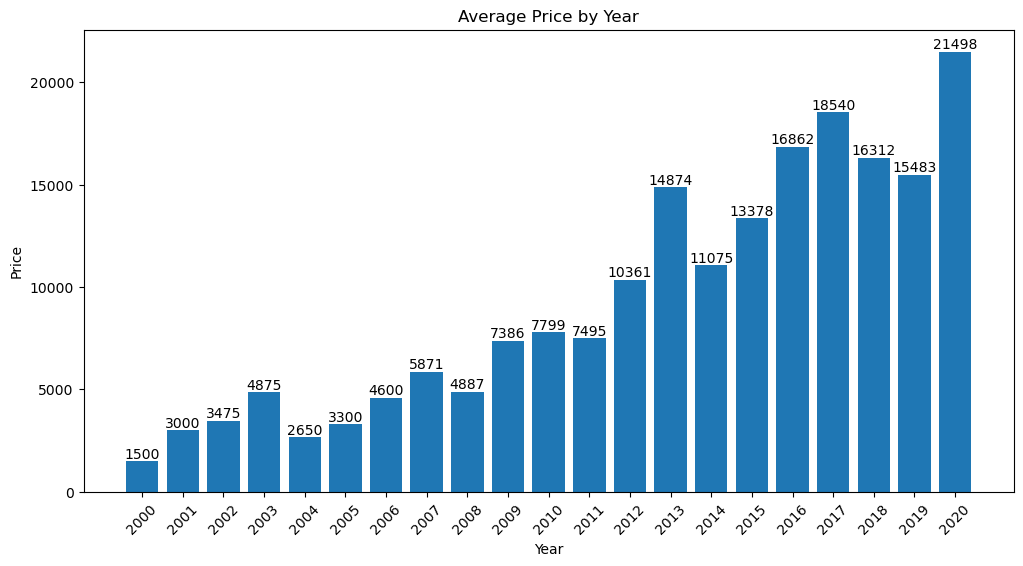

In [21]:
# Group the data by "Year" and calculate the mean price for each year
yearly_prices = filtered_df.groupby("Year")["Price"].mean()

# Create a wider figure
plt.figure(figsize=(12, 6))

plt.bar(yearly_prices.index, yearly_prices.values)

# Set the labels and title
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Average Price by Year")

# Use adaptive scale for the year axis
plt.xticks(yearly_prices.index, rotation=45)

# Add values on top of the bars with no digits after the period
for x, y in zip(yearly_prices.index, yearly_prices.values):
    y = int(y)  # Convert to an integer to remove digits after the period
    plt.text(x, y, f'{y}', ha='center', va='bottom')

# Show the chart
plt.show()

In [22]:
yearly_prices

Year
2000     1500.000000
2001     3000.000000
2002     3475.000000
2003     4875.000000
2004     2650.000000
2005     3300.000000
2006     4600.000000
2007     5871.000000
2008     4887.083333
2009     7386.153846
2010     7799.800000
2011     7495.000000
2012    10361.857143
2013    14874.500000
2014    11075.000000
2015    13378.400000
2016    16862.250000
2017    18540.428571
2018    16312.250000
2019    15483.750000
2020    21498.000000
Name: Price, dtype: float64

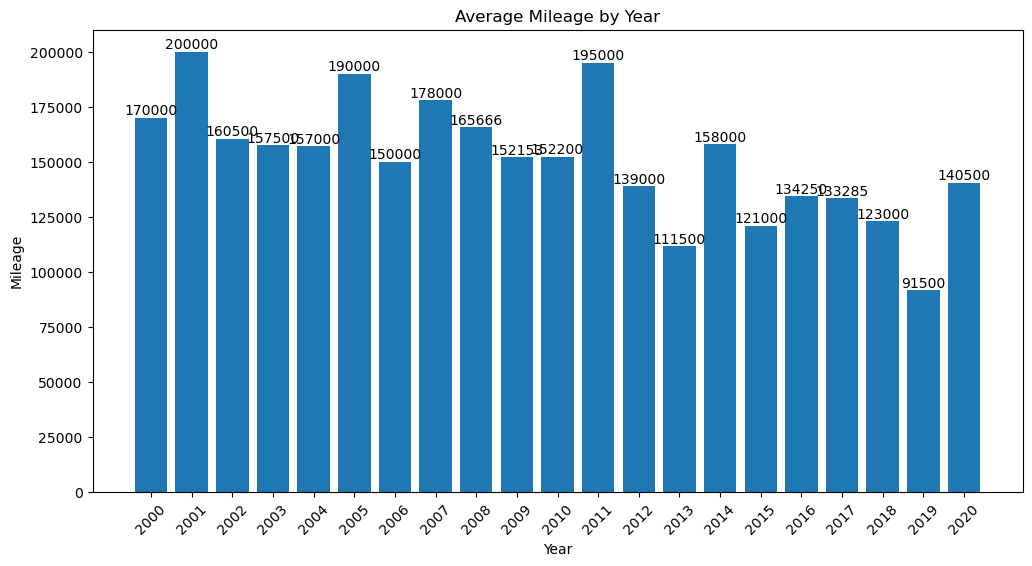

In [23]:
filtered_df = filtered_df[filtered_df["Mileage"] != 0]

# Group the data by "Year" and calculate the mean price for each year
yearly_miles = filtered_df.groupby("Year")["Mileage"].mean()

# Create a wider figure
plt.figure(figsize=(12, 6))

plt.bar(yearly_miles.index, yearly_miles.values)

# Use adaptive scale for the year axis
plt.xticks(yearly_miles.index, rotation=45)

# Set the labels and title
plt.xlabel("Year")
plt.ylabel("Mileage")
plt.title("Average Mileage by Year")

# Add values on top of the bars with no digits after the period
for x, y in zip(yearly_miles.index, yearly_miles.values):
    y = int(y)  # Convert to an integer to remove digits after the period
    plt.text(x, y, f'{y}', ha='center', va='bottom')

# Show the chart
plt.show()

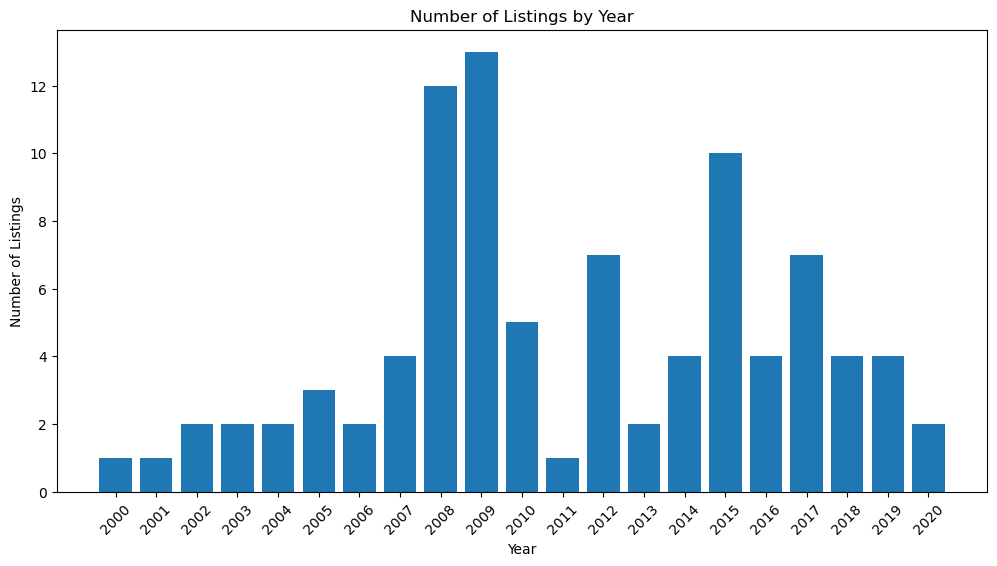

In [24]:
# Group the data by "Year" and calculate the mean price for each year
yearly_count = filtered_df.groupby("Year").size()

# Create a wider figure
plt.figure(figsize=(12, 6))

plt.bar(yearly_count.index, yearly_count.values)

# Set the labels and title
plt.xlabel("Year")
plt.ylabel("Number of Listings")
plt.title("Number of Listings by Year")

# Use adaptive scale for the year axis
plt.xticks(yearly_miles.index, rotation=45)


# Show the chart
plt.show()


In [25]:
cheapest_civic_url = filtered_df[filtered_df["Price"] == filtered_df["Price"].min()]["URL"].values[0]

In [26]:
cheapest_civic_url

'https://www.facebook.com//marketplace/item/1375446273409179/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'

In [28]:
csv_file_path = r'C:\Users\Victor\Documents\GitHub\facebook-marketplace-scraping\V1\cars.csv'

filtered_df.to_csv(csv_file_path, index=False)